In [52]:
def filterfunction(data):
    accx = data['accX']
    accz = data['accZ']
    roty = data['rotY']
    ss_angle = 0;
    alpha = 0.04
    sv= []
    for n in range(0, len(data)):
        xacc = accx[n]
        zacc = accz[n]
        ygyro = roty[n]
        
        theta = math.atan2(xacc,zacc)
        ss_angle = (1-alpha)*(ss_angle + (ygyro/104))+alpha*theta
        sv.append(ss_angle*(180/3.14))
    return sv
        


In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math as math


data1 = pd.read_csv("a_HN_data4.csv", header=None)
data1.columns = ["Sample", "Temperature [°C]",  "accX", "accY", "accZ", "rotX", "rotY", "rotZ"]

data2 = pd.read_csv("a_VN_data4.csv", header=None)
data2.columns = ["Sample", "Temperature [°C]",  "accX", "accY", "accZ", "rotX", "rotY", "rotZ"]

data3 = pd.read_csv("a_HO_data4.csv", header=None)
data3.columns = ["Sample", "Temperature [°C]",  "accX", "accY", "accZ", "rotX", "rotY", "rotZ"]

data4 = pd.read_csv("a_VO_data4.csv", header=None)
data4.columns = ["Sample", "Temperature [°C]",  "accX", "accY", "accZ", "rotX", "rotY", "rotZ"]

data5 = pd.read_csv("a_HN_data14.csv", header=None)
data5.columns = ["Sample", "Temperature [°C]",  "accX", "accY", "accZ", "rotX", "rotY", "rotZ"]

#data5 = pd.read_csv("RN_data15.csv", header=None)
#data5.columns = ["Sample", "Temperature [°C]",  "accX", "accY", "accZ", "rotX", "rotY", "rotZ"]

data6 = pd.read_csv("a_VN_data14.csv", header=None)
data6.columns = ["Sample", "Temperature [°C]",  "accX", "accY", "accZ", "rotX", "rotY", "rotZ"]

data7 = pd.read_csv("a_HO_data14.csv", header=None)
data7.columns = ["Sample", "Temperature [°C]",  "accX", "accY", "accZ", "rotX", "rotY", "rotZ"]

#data7 = pd.read_csv("RO_data15.csv", header=None)
#data7.columns = ["Sample", "Temperature [°C]",  "accX", "accY", "accZ", "rotX", "rotY", "rotZ"]

data8 = pd.read_csv("a_VO_data14.csv", header=None)
data8.columns = ["Sample", "Temperature [°C]",  "accX", "accY", "accZ", "rotX", "rotY", "rotZ"]

#Rightknee data 15




In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math as math

#Sportssensor data for up and down in right knee run
data1 = pd.read_csv("new_data15N.csv", header=None)
data1.columns = ["Sample", "Temperature [°C]",  "accX", "accY", "accZ", "rotX", "rotY", "rotZ"]

data3 = pd.read_csv("new_data15.csv", header=None)
data3.columns = ["Sample", "Temperature [°C]",  "accX", "accY", "accZ", "rotX", "rotY", "rotZ"]

#Sportssensor data for up and down in right knee walk
data2 = pd.read_csv("a_HN_data4.csv", header=None)
data2.columns = ["Sample", "Temperature [°C]",  "accX", "accY", "accZ", "rotX", "rotY", "rotZ"]

data4 = pd.read_csv("a_HO_data4.csv", header=None)
data4.columns = ["Sample", "Temperature [°C]",  "accX", "accY", "accZ", "rotX", "rotY", "rotZ"]



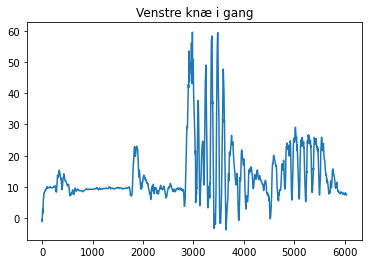

In [55]:
ppF2 = []
for item1, item2 in zip(filterfunction(data4), filterfunction(data2)):
    item = item1 - item2
    ppF2.append(item*-1)

plt.plot(ppF2)
plt.title("Venstre knæ i gang")
plt.show()

In [56]:
ppF2 = pd.DataFrame(ppF2)
ppF2.columns = ['X']
ppF2.to_csv('ppF2.csv')

In [57]:
SPORTS_rightknee_run = pd.read_csv('ppF1.csv')
Vicon_rightknee_run = pd.read_csv('PRO_rightknee2.csv')
SPORTS_rightknee_walk = pd.read_csv('ppF2.csv')
Vicon_rightknee_walk = pd.read_csv('PRO_rightknee.csv')

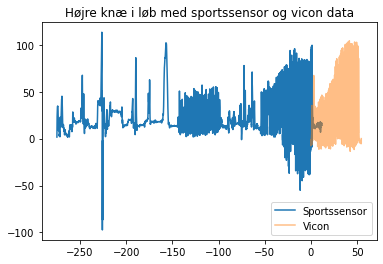

In [58]:
plt.plot((SPORTS_rightknee_run.index-28600)/104, SPORTS_rightknee_run['X'])
plt.plot((Vicon_rightknee_run.index)/200, Vicon_rightknee_run['X'], alpha = 0.5)
plt.legend(["Sportssensor", "Vicon"])
plt.title("Højre knæ i løb med sportssensor og vicon data")
plt.show()


In [59]:
SPORTS_rightknee_run.drop(index=data1.index[:23260], 
        axis=0, 
        inplace=True)
SPORTS_rightknee_run.reset_index(inplace=True)

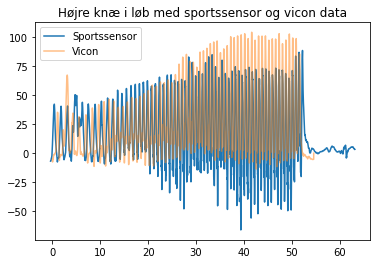

In [60]:
plt.plot((SPORTS_rightknee_run.index-40)/104, (SPORTS_rightknee_run['X']-11))
plt.plot((Vicon_rightknee_run.index)/200, Vicon_rightknee_run['X'], alpha = 0.5)
plt.legend(["Sportssensor", "Vicon"])
plt.title("Højre knæ i løb med sportssensor og vicon data")
plt.show()

In [61]:
SPORTS_rightknee_walk.drop(index=data1.index[:2750], 
        axis=0, 
        inplace=True)
SPORTS_rightknee_walk.reset_index(inplace=True)
SPORTS_rightknee_walk.drop(SPORTS_rightknee_walk.tail(2000).index,
        inplace = True)

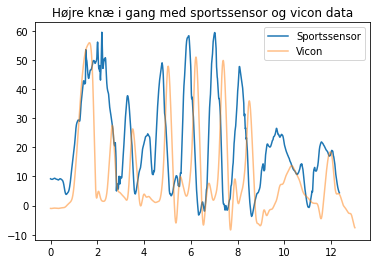

In [69]:
plt.plot((SPORTS_rightknee_walk.index)/104, (SPORTS_rightknee_walk['X']))
plt.plot((Vicon_rightknee_walk.index)/200, Vicon_rightknee_walk['X'], alpha = 0.5)
plt.legend(["Sportssensor", "Vicon"])
plt.title("Højre knæ i gang med sportssensor og vicon data")
plt.show()

In [63]:
Vicon_leftknee_walk = pd.read_csv('PRO_leftknee.csv')
Vicon_rightknee_walk = pd.read_csv('PRO_rightknee.csv')
Vicon_leftknee_run = pd.read_csv('PRO_leftknee2.csv')
Vicon_rightknee_run = pd.read_csv('PRO_rightknee2.csv')

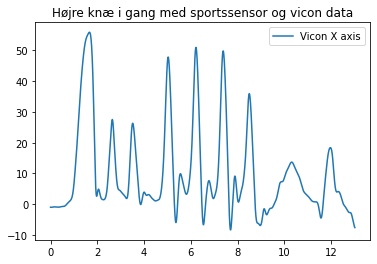

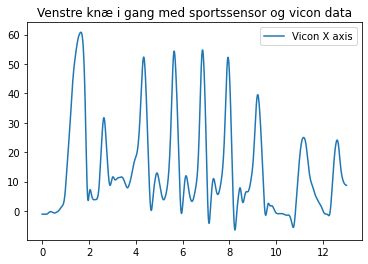

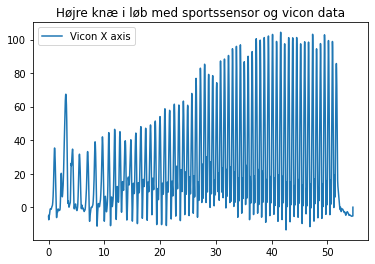

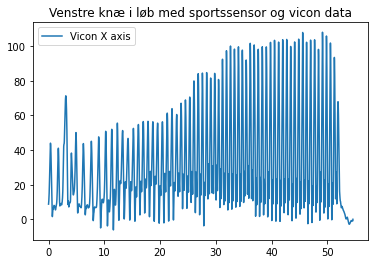

In [64]:
plt.plot((Vicon_rightknee_walk.index)/200, Vicon_rightknee_walk['X'])
plt.legend(["Vicon X axis"])
plt.title("Højre knæ i gang med sportssensor og vicon data")
plt.show()

plt.plot((Vicon_leftknee_walk.index)/200, Vicon_leftknee_walk['X'])
plt.legend(["Vicon X axis"])
plt.title("Venstre knæ i gang med sportssensor og vicon data")
plt.show()

plt.plot((Vicon_rightknee_run.index)/200, Vicon_rightknee_run['X'])
plt.legend(["Vicon X axis"])
plt.title("Højre knæ i løb med sportssensor og vicon data")
plt.show()

plt.plot((Vicon_leftknee_run.index)/200, Vicon_leftknee_run['X'])
plt.legend(["Vicon X axis"])
plt.title("Venstre knæ i løb med sportssensor og vicon data")
plt.show()

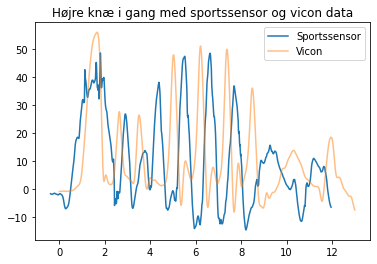

In [65]:
plt.plot((SPORTS_rightknee_walk.index-40)/104, (SPORTS_rightknee_walk['X']-11))
plt.plot((Vicon_rightknee_walk.index)/200, Vicon_rightknee_walk['X'], alpha = 0.5)
plt.legend(["Sportssensor", "Vicon"])
plt.title("Højre knæ i gang med sportssensor og vicon data")
plt.show()